In [67]:
import pandas as pd
import numpy as np
from pandas_datareader import data as dt
import matplotlib.pyplot as plt
import yfinance as yf
from pylab import *

In [68]:
startdate='2019-01-01'
enddate='2021-05-14'

In [69]:
def get_assets(assets):
    pf=pd.DataFrame()
    for elements in assets:
        pf[elements]=dt.DataReader(elements,data_source='yahoo',start=startdate,end=enddate)['Adj Close']
    return pf 

In [70]:
list_assets=['TSLA']
assets=get_assets(list_assets)
assets.head()

,TSLA
Date,
2019-01-02,6202.40%
2019-01-03,6007.20%
2019-01-04,6353.80%
2019-01-07,6699.20%
2019-01-08,6707.00%


In [71]:
#pd.options.display.float_format = '{0:.2%}'.format
rt=np.log(assets)-np.log(assets.shift(1))

In [72]:
rt=rt.dropna()
rt

,TSLA
Date,
2019-01-03,-3.20%
2019-01-04,5.61%
2019-01-07,5.29%
2019-01-08,0.12%
2019-01-09,0.94%
...,...
2021-05-10,-6.66%
2021-05-11,-1.90%
2021-05-12,-4.53%


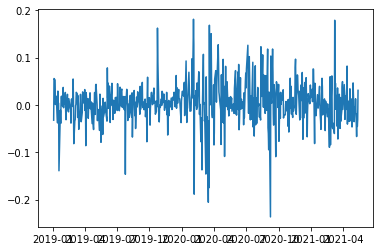

In [73]:
plt.plot(rt)

## Valor en riego

In [74]:
var_per=5
var_95=np.percentile(rt,var_per)
print('VaR {0:.2f}%'.format(var_95))


VaR -0.06%


## C- VaR

In [75]:
cvar_95=rt[rt<=var_95].mean()
cvar_95

TSLA   -10.62%
dtype: float64

## Gráfico de retornos + VaR

Text(0.5, 1.0, 'VaR')

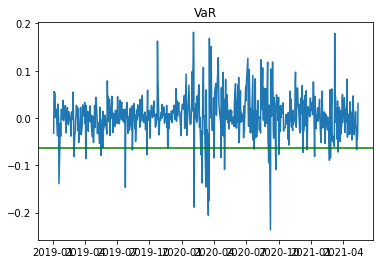

In [76]:
plt.plot(rt)
axhline(var_95,color='g',xmax=1)
#axhline(cvar_95,color='g',xmax=1)
plt.title('VaR')
